# Predicting Heart disease using Machine Learning

This notebook looks into various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether they have heart disease?

## 2. Data

The original data came from cleveland data from the UCI Machine Learning Repository.

There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
from sklearn.metrics import  RocCurveDisplay

## Load the data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data exploration (Exploratory data analysis or EDA)
The goal is to find out more about the data and become a subject matter export on the dataset you're working with.
1. What question(s) you are trying to solve?
2. What kind of data do we have and how do we treat different types of data?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [8]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [9]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [11]:
# finding out each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

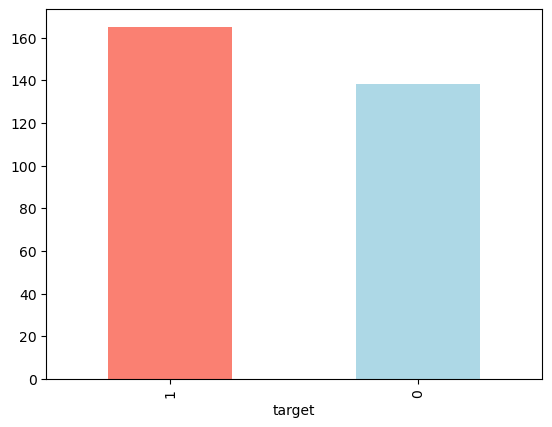

In [13]:
df["target"].value_counts().plot(kind="bar", color=["salmon", 'lightblue']);

## Heart disease frequency according to sex

In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
#comparing target to sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

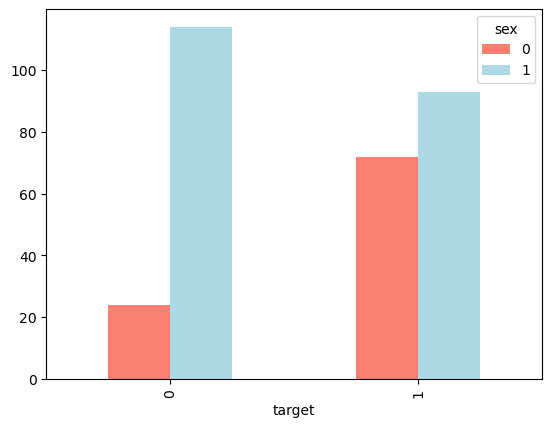

In [20]:
# plotting crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);

## Age vs Max heart rate for heart disease

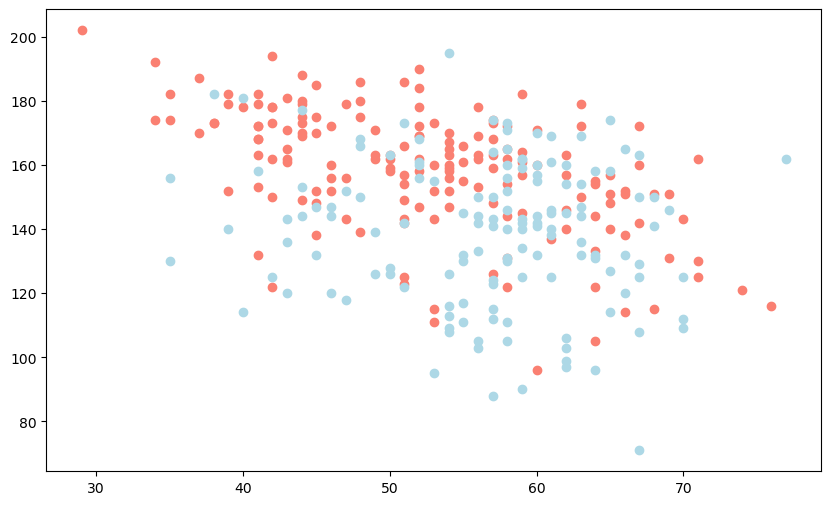

In [23]:
#Create another figure
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

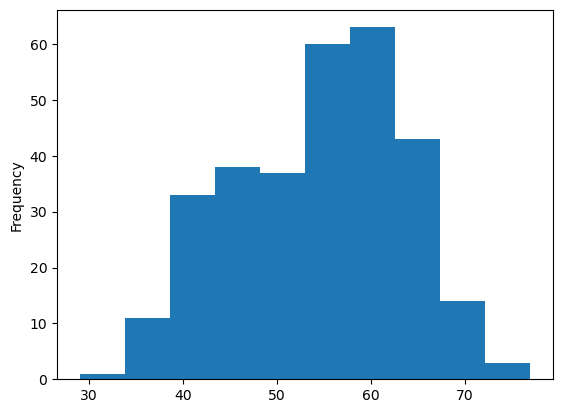

In [24]:
df.age.plot.hist();

## Heart disease frequency per chest type
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

In [27]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

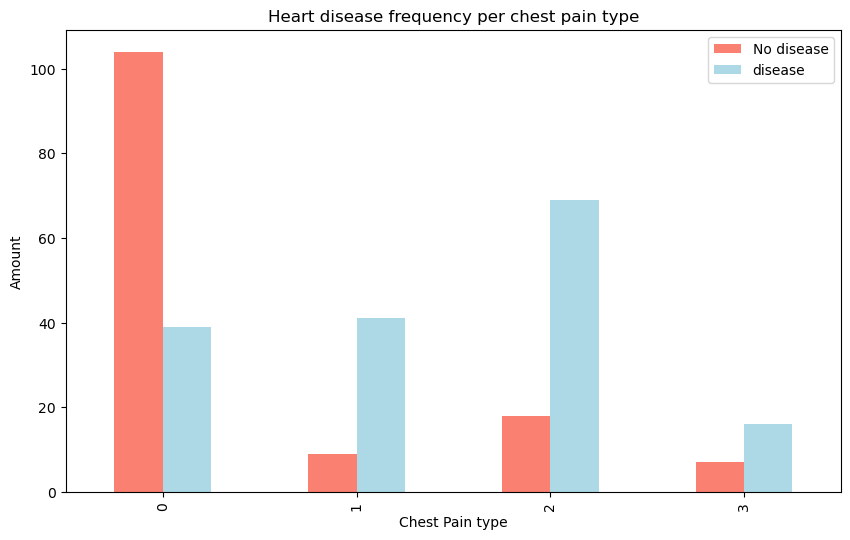

In [29]:
# make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", "lightblue"], figsize=(10,6));

# Add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "disease"])

In [3]:
# making correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

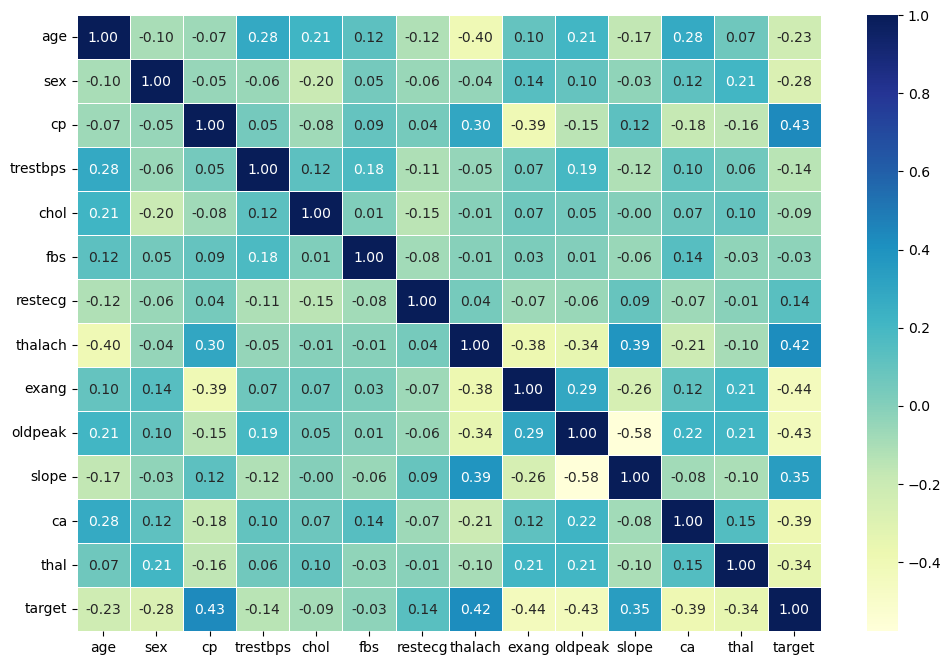

In [8]:
# making corr matrix more prettier
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr, annot=True, linewidths = 0.5, fmt=".2f", cmap="YlGnBu");

# Modelling

In [10]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
#X and Y
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
#Splitting the data into X and y
np.random.seed(42)

#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The data has been splitted into training and testing.

we'll train it (finding patterns) on the training set.

And then use those training sets to on the test set.

We're going to try 3 different ML models:
1. Logistic Regression
2. K-NN classifiers
3. Random Forest Classifier

In [5]:
#putting the models into dictionary

models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_test, X_train, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit ml models
    X_train: training data(no labels)
    X_test: testing data(no lables)
    y_train: training labels
    y_test: testing labels
    """
    #setting random seeds
    np.random.seed(42)
    #Make a dictionary to keep the model scores
    model_scores = {}
    #Loop thru models
    for name,model in models.items():
        #fit the model
        model.fit(X_train, y_train)
        #Evaluate the model and append the score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [6]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/Users/priyanshu/Documents/milestone_project-1/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

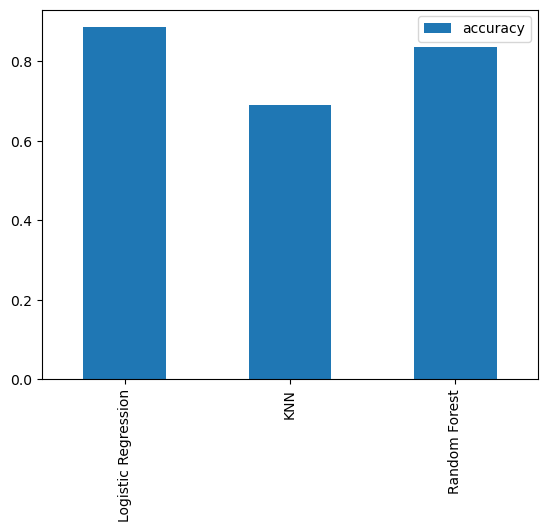

In [9]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning

In [7]:
# tuning KNN
train_scores = []
test_scores = []

# creating a list of different values for n_neighors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop thru different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the model
    knn.fit(X_train, y_train)

    #update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    #Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [8]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [9]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data: 75.41%


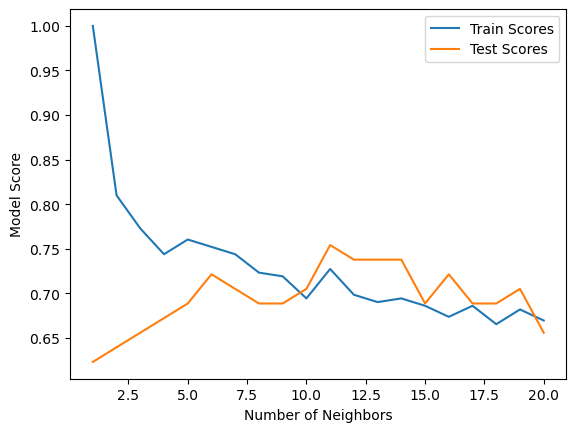

In [10]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparam tuning with RandomizedSearchCV

In [11]:
# create a hyperparam grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}
# for randomforestclassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [12]:
# Tune LogisticRegression
np.random.seed(42)

# Setup randm hyperparamter search for Logistic Regression
rs_reg = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparam search model for LogisticRegression
rs_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [13]:
rs_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [14]:
rs_reg.score(X_test, y_test)

0.8852459016393442

Doing same for RandomForestClassifier()

In [17]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup randm hyperparamter search for Logistic Regression
rs_cl = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparam search model for LogisticRegression
rs_cl.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [18]:
rs_cl.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [19]:
rs_cl.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV..

In [20]:
# Diff Hyperparams for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}
# Setup randm hyperparamter search for Logistic Regression
gs_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)
# Fit random hyperparam search model for LogisticRegression
gs_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [21]:
#checking best params
gs_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [22]:
gs_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating the model

In [24]:
y_preds = gs_reg.predict(X_test)

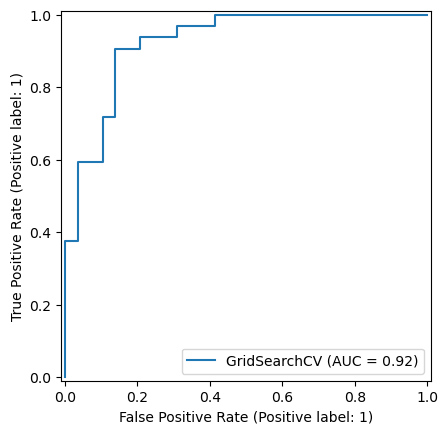

In [25]:
#plotting roc and auc metric
RocCurveDisplay.from_estimator(gs_reg, X_test, y_test);

In [26]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


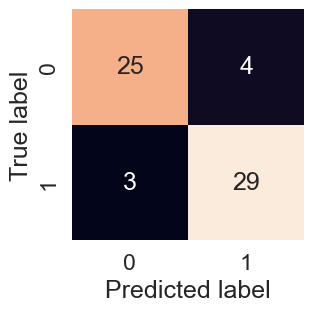

In [27]:
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_conf_mat(y_test, y_preds)

### Now, getting the classification report

In [28]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross-validation

In [29]:
gs_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [30]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [31]:
#cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [32]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [33]:
#cross validated precision
cv_p = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_p

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [34]:
cv_p = np.mean(cv_p)
cv_p

0.8215873015873015

In [35]:
#cross validated recall
cv_r = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_r

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [36]:
cv_r = np.mean(cv_r)
cv_r

0.9272727272727274

In [37]:
#cross validated f1-score
cv_f = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [38]:
cv_f = np.mean(cv_f)
cv_f

0.8705403543192143

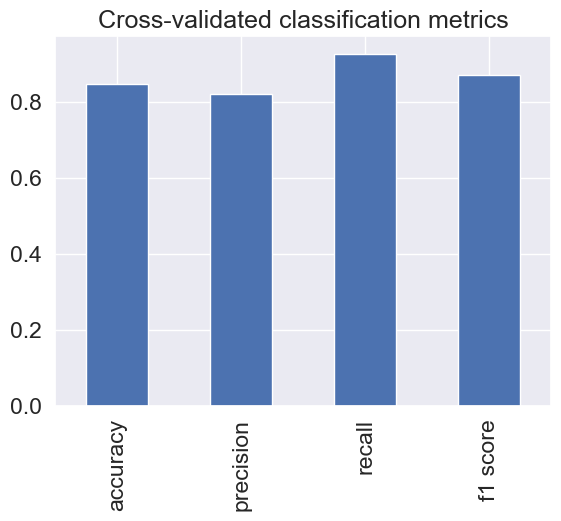

In [39]:
# visualizing metrics
cv_metrics = pd.DataFrame({"accuracy":cv_acc,
                        "precision":cv_p,
                        "recall":cv_r,
                        "f1 score":cv_f},
                          index=[0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend=False);

## Feature Importance

In [40]:
#fit an instance of LogisticRegression
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [41]:
# check coef
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [42]:
# match coef's of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992183633085857,
 'sex': -0.9042408474114028,
 'cp': 0.6747282820013463,
 'trestbps': -0.01161340415475584,
 'chol': -0.0017036448092066976,
 'fbs': 0.04787689082536315,
 'restecg': 0.33490184455843097,
 'thalach': 0.02472938514033986,
 'exang': -0.6312040052639052,
 'oldpeak': -0.5759090719885068,
 'slope': 0.4709511397091774,
 'ca': -0.6516535119713651,
 'thal': -0.6998419972478845}

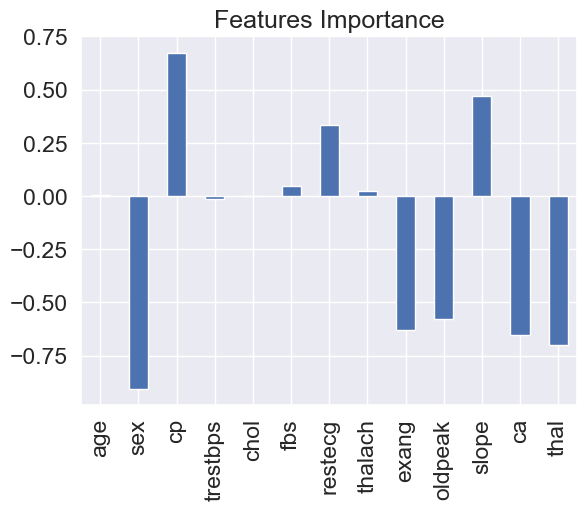

In [48]:
#visualize feature importance
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="Features Importance",legend=False);

In [49]:
pd.crosstab(df['sex'], df['target'])

target    0   1
sex            
0        24  72
1       114  93

In [50]:
pd.crosstab(df['slope'], df['target'])

target   0    1
slope          
0       12    9
1       91   49
2       35  107

slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with exercise(uncommon)
* 1: Flatsloping: minimal change(typical healthy heart)
* 3: Downsloping: signs of unhealthy heart